# オルンシュタイン・ウーベンレック過程

DDPG や TD3 などの決定的な方策オフアルゴリズムにおいて探索行動を生成するため**オルンシュタイン・ウーベンレック過程**を考える．

$$
\mathrm{d}X_t=-\theta(X_t-\mu)\mathrm{d}t+\sigma\mathrm{d}W_t
$$

ただし，$W_t$ はウイナー過程である．

実際にはこれを以下のように離散化したものを用いる．

$$
X_{k+1}=X_{k}-\theta(X_{k}-\mu)+\sigma\varepsilon_{k}
$$

ただし，$\varepsilon_{k}\sim\mathcal{N}(0,1)$ である．

In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
class OU_NOISE:

    def __init__(self, action_dimension, scale=1.0, mu=0, theta=0.15, sigma=0.3): 
        self.action_dimension = action_dimension
        self.scale = scale
        self.mu = mu
        self.theta = theta
        self.sigma = sigma
        self.state = np.ones(self.action_dimension) * self.mu
        self.reset()

    def reset(self):
        self.state = np.ones(self.action_dimension) * self.mu

    def noise(self):
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.random.randn(len(x))
        self.state = x + dx
        return self.state * self.scale

まずは1次元の確率過程を生成する．

In [27]:
ounoise = OU_NOISE(1)

In [28]:
time_list = []
noise_list = []

for i in range(1000):
    time_list.append(i)
    temp = ounoise.noise()
    noise_list.append(temp)

(0.0, 1000.0)

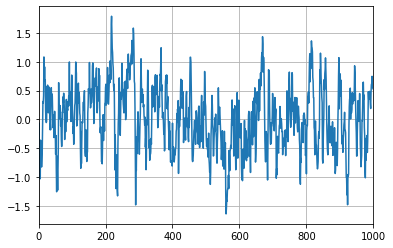

In [29]:
plt.grid(True)
plt.plot(time_list, noise_list)
plt.xlim(0,1000)

確率過程のパラメータを変えてみる．

In [45]:
ounoise = OU_NOISE(1, mu=0.0, theta = 0.005, sigma=0.5)
time_list = []
noise_list = []
ounoise.state = np.array([6.0])

for i in range(1000):
    time_list.append(i)
    temp = ounoise.noise()
    noise_list.append(temp)

(0.0, 1000.0)

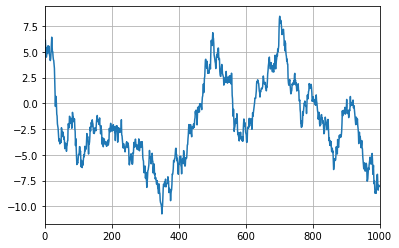

In [46]:
plt.grid(True)
plt.plot(time_list, noise_list)
plt.xlim(0,1000)

2次元の場合はクラスの引数を2に変更すれば良い．

In [47]:
ounoise = OU_NOISE(2)

In [48]:
time_list = []
noise1_list = []
noise2_list = []

for i in range(1000):
    time_list.append(i)
    temp1, temp2 = ounoise.noise()
    noise1_list.append(temp1)
    noise2_list.append(temp2)

(0.0, 1000.0)

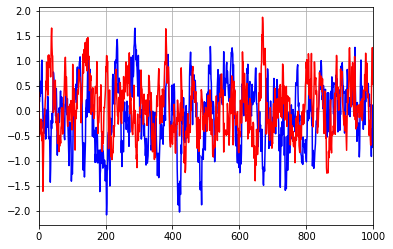

In [52]:
plt.grid(True)
plt.plot(time_list, noise1_list, color='b')
plt.plot(time_list, noise2_list, color='r')
plt.xlim(0,1000)